<h1>Identificador automático de idioma</h1>
<p><b>Problema</b>: Dados um texto de entrada, é possível identificar em qual língua o texto está escrito?</p>
<p>
Entrada: "texto qualquer" <br />
Saída: português ou inglês ou francês ou italiano ou...
</p>
<p>&nbsp;</p>

<h2>O processo de Reconhecimento de Padrões</h2>
<p>O objetivo desse trabalho é demonstrar o processo de "construção de atributos" e como ele é fundamental para o <b>Reconhecimento de Padrões (RP)</b>.</p>

<p>Primeiro um conjunto de "amostras" previamente conhecido (classificado)</p>

In [6]:
#
# amostras de texto em diferentes línguas
#
ingles = [
"Hello, how are you?",
"I love to read books.",
"The weather is nice today.",
"Where is the nearest restaurant?",
"What time is it?",
"I enjoy playing soccer.",
"Can you help me with this?",
"I'm going to the movies tonight.",
"This is a beautiful place.",
"I like listening to music.",
"Do you speak English?",
"What is your favorite color?",
"I'm learning to play the guitar.",
"Have a great day!",
"I need to buy some groceries.",
"Let's go for a walk.",
"How was your weekend?",
"I'm excited for the concert.",
"Could you pass me the salt, please?",
"I have a meeting at 2 PM.",
"I'm planning a vacation.",
"She sings beautifully.",
"The cat is sleeping.",
"I want to learn French.",
"I enjoy going to the beach.",
"Where can I find a taxi?",
"I'm sorry for the inconvenience.",
"I'm studying for my exams.",
"I like to cook dinner at home.",
"Do you have any recommendations for restaurants?",
]

espanhol = [
"Hola, ¿cómo estás?",
"Me encanta leer libros.",
"El clima está agradable hoy.",
"¿Dónde está el restaurante más cercano?",
"¿Qué hora es?",
"Voy al parque todos los días.",
"¿Puedes ayudarme con esto?",
"Me gustaría ir de vacaciones.",
"Este es mi libro favorito.",
"Me gusta bailar salsa.",
"¿Hablas español?",
"¿Cuál es tu comida favorita?",
"Estoy aprendiendo a tocar el piano.",
"¡Que tengas un buen día!",
"Necesito comprar algunas frutas.",
"Vamos a dar un paseo.",
"¿Cómo estuvo tu fin de semana?",
"Estoy emocionado por el concierto.",
"¿Me pasas la sal, por favor?",
"Tengo una reunión a las 2 PM.",
"Estoy planeando unas vacaciones.",
"Ella canta hermosamente.",
"El perro está jugando.",
"Quiero aprender italiano.",
"Disfruto ir a la playa.",
"¿Dónde puedo encontrar un taxi?",
"Lamento las molestias.",
"Estoy estudiando para mis exámenes.",
"Me gusta cocinar la cena en casa.",
"¿Tienes alguna recomendación de restaurantes?",
]

portugues = [
"Estou indo para o trabalho agora.",
"Adoro passar tempo com minha família.",
"Preciso comprar leite e pão.",
"Vamos ao cinema no sábado.",
"Gosto de praticar esportes ao ar livre.",
"O trânsito está terrível hoje.",
"A comida estava deliciosa!",
"Você já visitou o Rio de Janeiro?",
"Tenho uma reunião importante amanhã.",
"A festa começa às 20h.",
"Estou cansado depois de um longo dia de trabalho.",
"Vamos fazer um churrasco no final de semana.",
"O livro que estou lendo é muito interessante.",
"Estou aprendendo a cozinhar pratos novos.",
"Preciso fazer exercícios físicos regularmente.",
"Vou viajar para o exterior nas férias.",
"Você gosta de dançar?",
"Hoje é meu aniversário!",
"Gosto de ouvir música clássica.",
"Estou estudando para o vestibular.",
"Meu time de futebol favorito ganhou o jogo.",
"Quero aprender a tocar violão.",
"Vamos fazer uma viagem de carro.",
"O parque fica cheio aos finais de semana.",
"O filme que assisti ontem foi ótimo.",
"Preciso resolver esse problema o mais rápido possível.",
"Adoro explorar novos lugares.",
"Vou visitar meus avós no domingo.",
"Estou ansioso para as férias de verão.",
"Gosto de fazer caminhadas na natureza.",
"O restaurante tem uma vista incrível.",
"Vamos sair para jantar no sábado.",
]

A "amostras" de texto precisa ser "transformada" em <b>padrões</b>

<p>Um padrão é um conjunto de características, geralmente representado por um vetor e um conjunto de padrões no formato de tabela. Onde cada linha é um padrão e as colunas as características e, geralmente, na última coluna a <b>classe</b></p>

In [9]:
import random

pre_padroes = []
for frase in ingles:
  pre_padroes.append( [frase, 'inglês'])

for frase in espanhol:
  pre_padroes.append( [frase, 'espanhol'])

for frase in portugues:
  pre_padroes.append( [frase, 'português'])

random.shuffle(pre_padroes)
print(pre_padroes)

[['Estoy planeando unas vacaciones.', 'espanhol'], ['Preciso resolver esse problema o mais rápido possível.', 'português'], ["Let's go for a walk.", 'inglês'], ['I want to learn French.', 'inglês'], ['Gosto de fazer caminhadas na natureza.', 'português'], ['O filme que assisti ontem foi ótimo.', 'português'], ['Can you help me with this?', 'inglês'], ['Vamos ao cinema no sábado.', 'português'], ['What is your favorite color?', 'inglês'], ['Estou ansioso para as férias de verão.', 'português'], ['I enjoy playing soccer.', 'inglês'], ['Vou visitar meus avós no domingo.', 'português'], ['Me encanta leer libros.', 'espanhol'], ['O parque fica cheio aos finais de semana.', 'português'], ['¿Qué hora es?', 'espanhol'], ['Estou estudando para o vestibular.', 'português'], ['¿Dónde está el restaurante más cercano?', 'espanhol'], ['Este es mi libro favorito.', 'espanhol'], ['Where is the nearest restaurant?', 'inglês'], ["I'm sorry for the inconvenience.", 'inglês'], ['Disfruto ir a la playa.', 

O DataFrame do pandas facilita a visualização.

In [10]:
import pandas as pd
dados = pd.DataFrame(pre_padroes)
dados

,0,1
0,Estoy planeando unas vacaciones.,espanhol
1,Preciso resolver esse problema o mais rápido p...,português
2,Let's go for a walk.,inglês
3,I want to learn French.,inglês
4,Gosto de fazer caminhadas na natureza.,português
...,...,...
87,A comida estava deliciosa!,português
88,I like to cook dinner at home.,inglês
89,"Hola, ¿cómo estás?",espanhol
90,I enjoy going to the beach.,inglês


In [40]:
# a entrada é o vetor pre_padroes e a saída desse passo deverá ser "padrões"
import re

# Deixa as letras em caixa baixa, quebra a frase em palavras
def lista_palavras(texto):
  palavras = re.findall(r'\b\w+\b', texto.lower()) # Extração mais robusta de palavras
  return [s for s in palavras if len(s)>0]

# Extrai o tamanho médio das palavras
def tamanho_medio_palavras(texto_limpo):
    palavras = lista_palavras(texto_limpo)
    total_caracteres = sum(len(p) for p in palavras)
    return total_caracteres / len(palavras)

# Conta caracteres especiais do texto original
def proporcao_caracteres_especiais(texto_original, conjunto_caracteres_especiais):
    count = sum(1 for char in texto_original.lower() if char in conjunto_caracteres_especiais)
    total_chars = len(texto_original)
    if total_chars == 0:
        return 0
    return count / total_chars

def ocorrencias_simbolos_exclusivos(texto_original, conjunto_simbolos_exclusivos):
    count = sum(1 for char in texto_original.lower() if char in conjunto_simbolos_exclusivos)
    return float(count)

# In extraiCaracteristicas:
# caracteristica2 = contaEspeciais(frase[0]) # Pass the original phrase here
# Note: You might want to apply this *before* pattern_regex cleaning if you only want to count them in their original context.
"""
    Calcula a proporção de bigramas específicos (de caracteres, por palavra) em um texto.

    Args:
        texto_limpo (str): O texto já limpo (sem pontuação, em minúsculas).
        bigramas_do_idioma (list): Uma lista de bigramas-alvo para a qual a proporção será calculada.

    Returns:
        float: A proporção de bigramas-alvo em relação ao total de trigramas encontrados.
"""
def proporcao_bigramas_por_palavra(texto_limpo, bigramas_do_idioma):
    palavras = lista_palavras(texto_limpo)
    
    bigramas_todas_palavras = []
    for palavra in palavras:
        # Gera bigramas para cada palavra
        for i in range(len(palavra) - 1):
            bigramas_todas_palavras.append(palavra[i:i+2])

    if not bigramas_todas_palavras:
        return 0

    total_bigramas_especificos = 0
    for bigrama in bigramas_do_idioma:
        total_bigramas_especificos += bigramas_todas_palavras.count(bigrama)
    
    return total_bigramas_especificos / len(bigramas_todas_palavras)

"""
    Calcula a proporção de trigramas específicos (de caracteres, por palavra) em um texto.

    Args:
        texto_limpo (str): O texto já limpo (sem pontuação, em minúsculas).
        trigramas_do_idioma (list): Uma lista de trigramas-alvo para a qual a proporção será calculada.

    Returns:
        float: A proporção de trigramas-alvo em relação ao total de trigramas encontrados.
"""
def proporcao_trigama_por_palavra(texto_limpo, trigramas_do_idioma):
    palavras = lista_palavras(texto_limpo)
    
    trigramas_todas_palavras = []
    for palavra in palavras:
        # Gera trigramas (sequências de 3 caracteres) dentro de cada palavra
        # O loop vai até len(word) - 2 para garantir que haja 3 caracteres (i, i+1, i+2)
        for i in range(len(palavra) - 2): # i de 0 até len(word) - 3
            trigramas_todas_palavras.append(palavra[i : i + 3]) # Pega os caracteres nos índices i, i+1, i+2
            
    if not trigramas_todas_palavras:
        return 0

    total_trigramas_especificos = 0
    for trigrama in trigramas_do_idioma:
        total_trigramas_especificos += trigramas_todas_palavras.count(trigrama)
    
    return total_trigramas_especificos / len(trigramas_todas_palavras)

"""
    Calcula a proporção de vogais para consoantes num texto.
"""
def razao_vogal_consoante(texto_limpo):
    vowels = "aeiouáàâãéêíóôõúü"
    consonants = "bcdfghjklmnpqrstvwxyzç"
    text_lower = texto_limpo.lower()
    num_vowels = sum(text_lower.count(v) for v in vowels)
    num_consonants = sum(text_lower.count(c) for c in consonants)
    if num_consonants == 0:
        return 0
    return num_vowels / num_consonants

"""
Calcula a proporção de palavras específicas (stop words) em um texto.
"""
def contar_palavras_especificas_do_idioma(texto_limpo, palavras_especificas):
    palavras = lista_palavras(texto_limpo)
    count = 0
    for palavra in palavras:
        if palavra in palavras_especificas:
            count += 1
    return count / len(palavras) if palavras else 0

# Bigramas mais comuns para as linguagens abaixo:
bigramas_pt = ['nh', 'lh', 'qu', 'gu', 'sc', 'ss', 'ns', 'da', 'do', 'em', 'um']
bigramas_es = ['ll', 'gu', 'qu', 'el', 'la', 'de', 'en', 'un']
bigramas_en = ['th', 'he', 'in', 'er', 'an', 're', 'on', 'at', 'nd', 'to', 'of', 'is']

# Trigramas mais comuns para as linguagens abaixo:
trigramas_pt = ['ção', 'ões', 'eza', 'oso', 'nte', 'ndo', 'ram']
trigramas_es = ['ado', 'ida', 'nte', 'lla', 'rro', 'que', 'gui', 'llo', 'cha', 'ñol', 'ión']
trigramas_en = ['ing', 'ion', 'ent', 'ame', 'the', 'and', 'for', 'wit']

# Define um conjunto de caracteres especiais
caracteres_especiais_pt = 'çãõàâêôõ'
caracteres_especiais_es = 'ñ' # com ênfase no 'ñ'
caracteres_especiais_en = '' # Inglês não tem distinção especial neste contexto

# Stop Words (palavras muito comuns)
stop_words_pt = ['o', 'a', 'os', 'as', 'de', 'da', 'do', 'e', 'em', 'um', 'uma', 'para', 'com', 'que', 'não', 'eu', 'você']
stop_words_es = ['el', 'la', 'los', 'las', 'de', 'y', 'en', 'un', 'una', 'para', 'con', 'que', 'no', 'yo', 'tu']
stop_words_en = ['the', 'a', 'an', 'is', 'are', 'and', 'of', 'to', 'in', 'for', 'with', 'that', 'not', 'i', 'you']

# Pontuação especial para favorecer distinção entre espanhol e português
pontuacao_especial_es = '¿¡'

"""
  Extrai um vetor de características para uma dada frase.
  Args:
    frase (list): Uma lista contendo [texto_da_frase, classe_da_lingua].
  Returns:
    list: Um vetor de características seguido da classe da língua.
  """
def extrair_caracteristicas(frase):

  texto_original = frase[0] 

  # Remover pontuação e converter para caixa baixa
  texto_limpo = re.sub(r'[^a-zA-Z0-9\s]', '', texto_original).lower()

  # Feature 1: Tamanho médio de palavras
  caracteristica_1 = tamanho_medio_palavras(texto_limpo)

  # Feature 2: Proporção de caracteres especiais do português
  caracteristica_2 = proporcao_caracteres_especiais(texto_original, caracteres_especiais_pt)

  # Feature 3: Proporção de caracteres especiais do espanhol
  caracteristica_3 = proporcao_caracteres_especiais(texto_original, caracteres_especiais_es)

  # Nota: Inglês não possui caracteres especiais apurados

  # Feature 4: Proporção de Bigramas (Português)
  caracteristica_4 = proporcao_bigramas_por_palavra(texto_limpo, bigramas_pt)

  # Feature 5: Proporção de Bigramas (Espanhol)
  caracteristica_5 = proporcao_bigramas_por_palavra(texto_limpo, bigramas_es)

  # Feature 6: Proporção de Bigramas (Inglês)
  caracteristica_6 = proporcao_bigramas_por_palavra(texto_limpo, bigramas_en)

   # 7. Proporção de Trigramas (Português)
  caracteristica_7 = proporcao_trigama_por_palavra(texto_limpo, trigramas_pt)

  # 8. Proporção de Trigramas (Espanhol)
  caracteristica_8 = proporcao_trigama_por_palavra(texto_limpo, trigramas_es)

  # 9. Proporção de Trigramas (Inglês)
  caracteristica_9 = proporcao_trigama_por_palavra(texto_limpo, trigramas_en)

   # 10. Razão Vogal/Consoante
  caracteristica_10 = razao_vogal_consoante(texto_limpo)

  # 11. Proporção de Stop Words (Português)
  caracteristica_11 = contar_palavras_especificas_do_idioma(texto_limpo, stop_words_pt)

  # 12. Proporção de Stop Words (Espanhol)
  caracteristica_12 = contar_palavras_especificas_do_idioma(texto_limpo, stop_words_es)

  # 13. Proporção de Stop Words (Inglês)
  caracteristica_13 = contar_palavras_especificas_do_idioma(texto_limpo, stop_words_en)

  # Feature 14: Quantidade de ocorrências de pontuação exclusiva do espanhol (¿¡)
  caracteristica_14 = ocorrencias_simbolos_exclusivos(texto_original, pontuacao_especial_es)

  # Adicionar todas as características no vetor de padrões
  padrao = [
      caracteristica_1,  # Tamanho médio das palavras
      caracteristica_2,  # Caracteres especiais PT
      caracteristica_3,  # Caracteres especiais ES
      caracteristica_4,  # Bigramas PT
      caracteristica_5,  # Bigramas ES
      caracteristica_6,  # Bigramas EN
      caracteristica_7,  # Trigramas PT
      caracteristica_8,  # Trigramas ES
      caracteristica_9,  # Trigramas EN
      caracteristica_10, # Razão Vogal/Consoante
      caracteristica_11, # Stop Words PT
      caracteristica_12, # Stop Words ES
      caracteristica_13, # Stop Words EN,
      caracteristica_14, # Pontuação exclusiva ES
      frase[1] # A classe (idioma)
  ]
  return padrao


def gera_padroes(frases):
  padroes = []
  for frase in frases:
    padrao = extrair_caracteristicas(frase)
    padroes.append(padrao)
  return padroes

# converte o formato [frase classe] em
# [caracteristica_1, caracteristica_2,... caracteristica n, classe]
padroes = gera_padroes(pre_padroes)

dados = pd.DataFrame(padroes)
dados

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,7.000000,0.0,0.0,0.041667,0.083333,0.208333,0.05,0.000000,0.1,0.866667,0.000000,0.000000,0.000000,0.0,espanhol
1,5.500000,0.0,0.0,0.111111,0.027778,0.138889,0.00,0.000000,0.0,0.692308,0.125000,0.000000,0.000000,0.0,português
2,2.800000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.2,0.555556,0.200000,0.000000,0.400000,0.0,inglês
3,3.600000,0.0,0.0,0.000000,0.076923,0.230769,0.00,0.000000,0.0,0.500000,0.000000,0.000000,0.400000,0.0,inglês
4,5.333333,0.0,0.0,0.076923,0.038462,0.192308,0.05,0.000000,0.0,0.777778,0.166667,0.166667,0.000000,0.0,português
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,5.500000,0.0,0.0,0.055556,0.111111,0.000000,0.00,0.066667,0.0,1.200000,0.250000,0.000000,0.250000,0.0,português
88,3.285714,0.0,0.0,0.000000,0.000000,0.250000,0.00,0.000000,0.0,0.916667,0.000000,0.000000,0.285714,0.0,inglês
89,3.666667,0.0,0.0,0.000000,0.125000,0.000000,0.00,0.000000,0.0,0.571429,0.000000,0.000000,0.000000,1.0,espanhol
90,3.500000,0.0,0.0,0.000000,0.066667,0.266667,0.00,0.000000,0.2,0.750000,0.000000,0.000000,0.500000,0.0,inglês


<h2>Treinando o modelo com SVM</h1>
<p>Separando o conjunto de treinamento do conjunto de testes</p>

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
import numpy as np

vet = np.array(padroes, dtype=object) # Certifique-se de que é dtype=object se tiver strings
classes = vet[:, -1]

padroes_sem_classe = vet[:, 0:-1].astype(float) # Converter para float é crucial para o scaler

# 1. Inicialize o escalador
scaler = StandardScaler() # Ou MinMaxScaler()

# 2. Fit (aprender os parâmetros de escalonamento) APENAS nos dados de treinamento
# (Para evitar data leakage, treinamos o scaler após o split, mas aqui vamos escalar tudo e depois splitar)
# Uma abordagem mais robusta seria:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# Mas para o trabalho, pode ser mais simples escalar tudo primeiro:
padroes_escalados = scaler.fit_transform(padroes_sem_classe)
#print(padroes_escalados)

# Define uma semente para garantir a reprodutibilidade
SEED = 42 # Você pode escolher qualquer número inteiro
X_train, X_test, y_train, y_test = train_test_split(
    padroes_escalados, classes, test_size=0.25, stratify=classes, random_state=SEED
)

Com os conjuntos separados, podemos "treinar" o modelo usando a SVM.

Acurácia nos dados de treinamento: 94.20%

--- Matriz de Confusão (Dados de Treinamento) ---


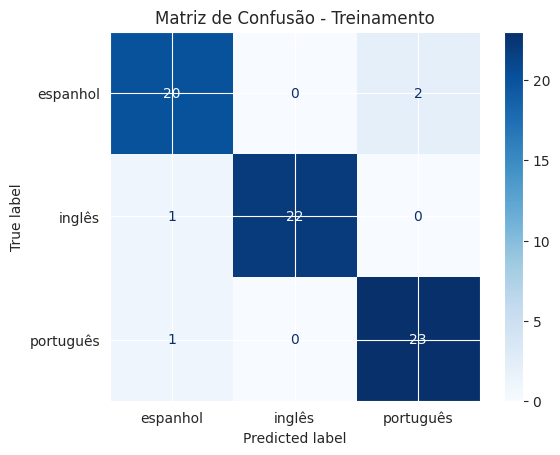


--- Relatório de Classificação (Dados de Treinamento) ---
              precision    recall  f1-score   support

    espanhol       0.91      0.91      0.91        22
      inglês       1.00      0.96      0.98        23
   português       0.92      0.96      0.94        24

    accuracy                           0.94        69
   macro avg       0.94      0.94      0.94        69
weighted avg       0.94      0.94      0.94        69


--- Métrica Dados de Teste ---
Acurácia nos dados de teste: 78.26%

--- Matriz de Confusão (Dados de Teste) ---


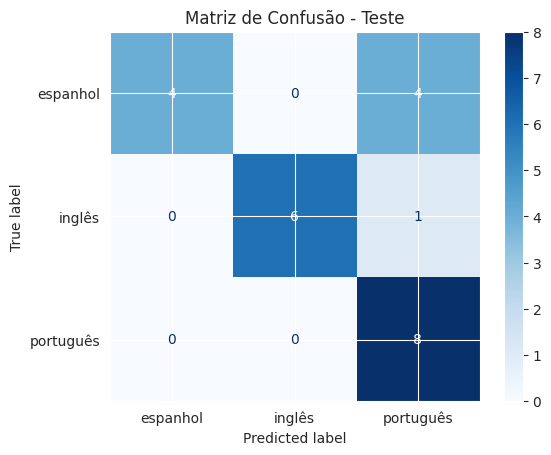


--- Relatório de Classificação (Dados de Teste) ---
              precision    recall  f1-score   support

    espanhol       1.00      0.50      0.67         8
      inglês       1.00      0.86      0.92         7
   português       0.62      1.00      0.76         8

    accuracy                           0.78        23
   macro avg       0.87      0.79      0.78        23
weighted avg       0.87      0.78      0.78        23



In [42]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Importar matplotlib

treinador = svm.SVC()  #algoritmo escolhido
modelo = treinador.fit(X_train, y_train)

# --- Acurácia e Matriz de Confusão para dados de TREINAMENTO ---
acuracia = modelo.score(X_train, y_train)
print("Acurácia nos dados de treinamento: {:.2f}%".format(acuracia * 100))

# melhor avaliar com a matriz de confusão
# y_pred = modelo.predict(X_train)
# cm = confusion_matrix(y_train, y_pred)
# Previsões nos dados de treinamento
y_pred_train = modelo.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
labels = sorted(list(set(y_train))) # Garante a ordem correta das classes

print("\n--- Matriz de Confusão (Dados de Treinamento) ---")
# Use ConfusionMatrixDisplay para exibir a matriz com legendas
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Treinamento')
plt.show()

print("\n--- Relatório de Classificação (Dados de Treinamento) ---")
print(classification_report(y_train, y_pred_train, target_names=labels)) # Usar target_names aqui também

print('\n--- Métrica Dados de Teste ---')

y_pred_test = modelo.predict(X_test)
# Acurácia nos dados de teste
acuracia_test = modelo.score(X_test, y_test)
print("Acurácia nos dados de teste: {:.2f}%".format(acuracia_test * 100))
# Matriz de confusão para os dados de teste
cm_test = confusion_matrix(y_test, y_pred_test)

print("\n--- Matriz de Confusão (Dados de Teste) ---")
# Use ConfusionMatrixDisplay para exibir a matriz com legendas
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Teste')
plt.show()

print("\n--- Relatório de Classificação (Dados de Teste) ---")
print(classification_report(y_test, y_pred_test, target_names=labels)) # Usar target_names aqui